In [1]:
import pandas as pd
import numpy as np

In [2]:
crop = pd.read_csv(r"D:\Sem 2\Machine Learning\ML PROJECT CROP RECCOMENDATION\Crop_recommendation (1).csv")

In [6]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop.shape

(2200, 8)

In [8]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
crop.duplicated().sum()

np.int64(0)

In [19]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [20]:
crop.corr(numeric_only=True)


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

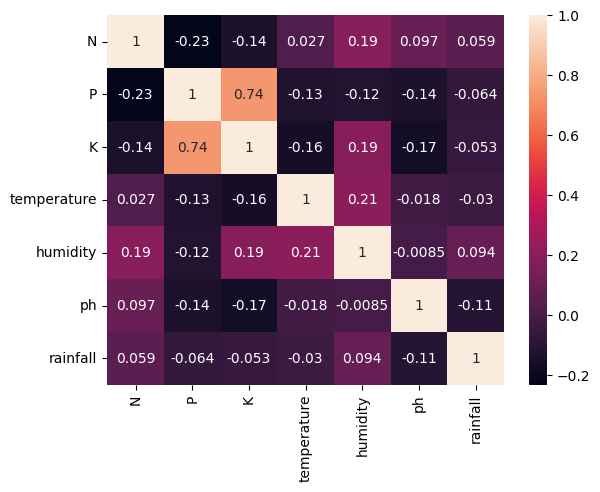

In [21]:
import seaborn as sns
sns.heatmap(crop.corr(numeric_only=True), annot=True, cbar=True)
#Potassium and Phosphorus is having 0.74 correlation means highly correlated.

In [22]:
crop.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [23]:
#Multiclass classification problem
crop['label'].unique().size

22

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25116\1018874597.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


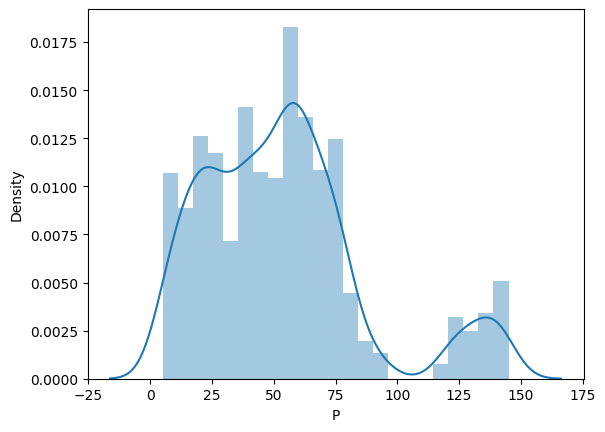

In [24]:
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25116\2091051290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


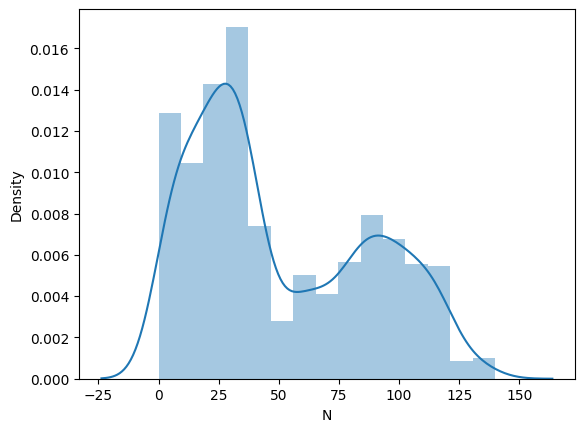

In [25]:
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()

In [11]:
# Using Interquartile Range (IQR) to detect outliers
import pandas as pd
import numpy as np
numeric_data = crop.select_dtypes(include=[np.number])
# Calculate Q1, Q3, and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
# Identifying outliers
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:\n", outliers)
# Removing outliers
crop_cleaned = crop[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape before outlier removal:", crop.shape)
print("Shape after outlier removal:", crop_cleaned.shape)


Outliers in each column:
 N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64
Shape before outlier removal: (2200, 8)
Shape after outlier removal: (1768, 8)


In [25]:
#Z-score :
import pandas as pd
import numpy as np
from scipy import stats
data = pd.read_csv(r"D:\Sem 2\Machine Learning\ML PROJECT CROP RECCOMENDATION\Crop_recommendation (1).csv")
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_data))
outlier_indices = np.where(z_scores > 3)
print("Outliers detected at indices:", outlier_indices)


Outliers detected at indices: (array([   6,   12,   16,   19,   26,   30,   33,   36,   37,   38,   43,
         54,   55,   59,   62,   69,   72,   75,   76,   90,   96,   97,
        232,  240,  295,  500,  503,  507,  514,  518,  521,  523,  526,
        529,  535,  536,  537,  540,  546,  550,  553,  557,  561,  563,
        568,  582,  583,  584,  590,  594,  595,  599, 1201, 1202, 1208,
       1209, 1211, 1211, 1212, 1213, 1214, 1214, 1216, 1217, 1219, 1220,
       1223, 1225, 1226, 1230, 1231, 1233, 1235, 1237, 1239, 1240, 1241,
       1247, 1247, 1249, 1250, 1250, 1251, 1254, 1256, 1258, 1259, 1260,
       1261, 1263, 1267, 1268, 1270, 1272, 1275, 1275, 1277, 1278, 1279,
       1279, 1280, 1281, 1283, 1284, 1287, 1291, 1291, 1292, 1293, 1294,
       1295, 1296, 1297, 1299, 1299, 1502, 1503, 1504, 1505, 1506, 1507,
       1512, 1518, 1520, 1524, 1525, 1531, 1533, 1534, 1536, 1538, 1539,
       1540, 1543, 1544, 1548, 1549, 1551, 1556, 1557, 1558, 1559, 1561,
       1565, 1568, 1

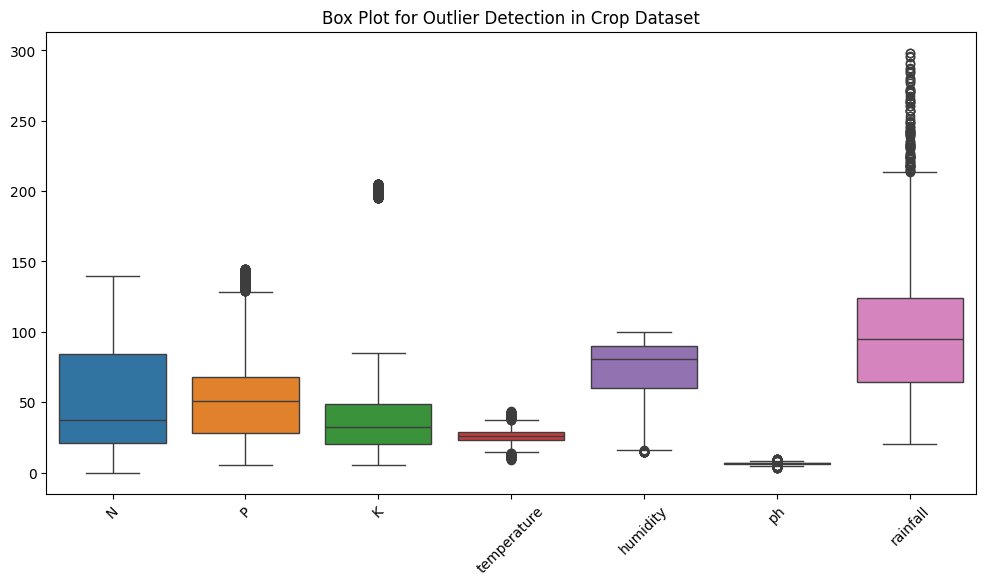

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=45)
plt.title("Box Plot for Outlier Detection in Crop Dataset")
plt.show()


In [26]:
#Encoding data because we have one categorical column for levels
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [27]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

crop['label'] = crop['label'].map(crop_dict)

In [28]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [29]:
crop.label.unique()

array([ 1,  2, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,
        6,  5,  4,  3, 22])

In [30]:
crop.label.value_counts()

label
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [31]:
#Divide dataset into train and split
x=crop.drop('label',axis=1)
y=crop['label']


In [32]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [35]:
x_train.shape

(1760, 7)

In [36]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_train = mx.fit_transform(x_train)
x_test = mx.transform(x_test)

In [37]:
#Range of 0 to 1
x_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]], shape=(1760, 7))

In [39]:
#Standardization of dataset:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test=sc.transform(x_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNBg
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [44]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier()
}

In [45]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
GaussianNB model with accuracy: 0.9954545454545455
SVC model with accuracy: 0.9681818181818181
KNeighborsClassifier model with accuracy: 0.9590909090909091
DecisionTreeClassifier model with accuracy: 0.9863636363636363
ExtraTreeClassifier model with accuracy: 0.8568181818181818
RandomForestClassifier model with accuracy: 0.9931818181818182
BaggingClassifier model with accuracy: 0.9863636363636363
GradientBoostingClassifier model with accuracy: 0.9818181818181818


In [47]:
randclf = RandomForestClassifier()
randclf.fit(x_train, y_train)
y_pred = randclf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9931818181818182

In [48]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [49]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [50]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [51]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [52]:
predict 

array([6])

In [53]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

In [3]:
#Python Pivot table queries:
import pandas as pd
file_path=(r"C:\Users\Lenovo\Crop_recommendation (1).csv")
df=pd.read_csv(file_path)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
#1.Average NPK levels per crop
pivot_npk=df.pivot_table(index='label',values=['N','P','K'],aggfunc='mean')
print("Average NPK levels for each crop:\n"pivot_npk)                         

Average NPK levels for each crop:
                   K       N       P
label                              
apple        199.89   20.80  134.22
banana        50.05  100.23   82.01
blackgram     19.24   40.02   67.47
chickpea      79.92   40.09   67.79
coconut       30.59   21.98   16.93
coffee        29.94  101.20   28.74
cotton        19.56  117.77   46.24
grapes       200.11   23.18  132.53
jute          39.99   78.40   46.86
kidneybeans   20.05   20.75   67.54
lentil        19.41   18.77   68.36
maize         19.79   77.76   48.44
mango         29.92   20.07   27.18
mothbeans     20.23   21.44   48.01
mungbean      19.87   20.99   47.28
muskmelon     50.08  100.32   17.72
orange        10.01   19.58   16.55
papaya        50.04   49.88   59.05
pigeonpeas    20.29   20.73   67.73
pomegranate   40.21   18.87   18.75
rice          39.87   79.89   47.58
watermelon    50.22   99.42   17.00


In [11]:
#2.Average temperature, humidity, and rainfall per crop
pivot_weather = df.pivot_table(index='label', values=['temperature', 'humidity', 'rainfall'], aggfunc='mean')
print("Average weather conditions for each crop:\n", pivot_weather)

Average weather conditions for each crop:
               humidity    rainfall  temperature
label                                          
apple        92.333383  112.654779    22.630942
banana       80.358123  104.626980    27.376798
blackgram    65.118426   67.884151    29.973340
chickpea     16.860439   80.058977    18.872847
coconut      94.844272  175.686646    27.409892
coffee       58.869846  158.066295    25.540477
cotton       79.843474   80.398043    23.988958
grapes       81.875228   69.611829    23.849575
jute         79.639864  174.792798    24.958376
kidneybeans  21.605357  105.919778    20.115085
lentil       64.804785   45.680454    24.509052
maize        65.092249   84.766988    22.389204
mango        50.156573   94.704515    31.208770
mothbeans    53.160418   51.198487    28.194920
mungbean     85.499975   48.403601    28.525775
muskmelon    92.342802   24.689952    28.663066
orange       92.170209  110.474969    22.765725
papaya       92.403388  142.627839    33.7238

In [12]:
#3.Nitrogen levels across different rainfall ranges
import pandas as pd
df['Rainfall_Range']=pd.cut(df['rainfall'],bins=[0,50,100,150,200,300],labels=['0-50','51-100','101-150','151-200','201-300'])
pivot_rainfall_nitrogen=df.pivot_table(index='Rainfall_Range',values='N',aggfunc='mean')
print("Average nitrogen level for different rainfall ranges:\n",pivot_rainfall_nitrogen)

Average nitrogen level for different rainfall ranges:
                         N
Rainfall_Range           
0-50            56.102719
51-100          51.311916
101-150         38.294218
151-200         62.000000
201-300         60.893939


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15288\3432068168.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_rainfall_nitrogen=df.pivot_table(index='Rainfall_Range',values='N',aggfunc='mean')


In [14]:
#4.Count of crops grown in each temperature range
df['Temperature_Range']=pd.cut(df['temperature'], bins=[0, 10, 20, 30, 40], labels=['0-10', '11-20', '21-30', '31-40'])
pivot_temperature_crops=df.pivot_table(index='Temperature_Range',values='label',aggfunc='count')
print("No.of crops grown in different temperature ranges:\n",pivot_temperature_crops)

No.of crops grown in different temperature ranges:
                    label
Temperature_Range       
0-10                   6
11-20                285
21-30               1611
31-40                270


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15288\2064274636.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_temperature_crops=df.pivot_table(index='Temperature_Range',values='label',aggfunc='count')


In [7]:
#5: Relationship between potassium levels and humidity categories
df['Humidity_Range'] = pd.cut(df['humidity'], bins=[0, 30, 60, 90, 100], labels=['0-30', '31-60', '61-90', '91-100'])
pivot_humidity_potassium=df.pivot_table(index='Humidity_Range',values='K',aggfunc='mean')
print("Average Potassium level for different humidity ranges:\n",pivot_humidity_potassium)

Average Potassium level for different humidity ranges:
                         K
Humidity_Range           
0-30            49.985000
31-60           24.794118
61-90           46.317161
91-100          65.722121


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15288\1870005017.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_humidity_potassium=df.pivot_table(index='Humidity_Range',values='K',aggfunc='mean')


In [16]:
#6:Aggregating all features for each crop type
pivot_crops_summary=df.pivot_table(index='label',values=['N','P','K','temperature','humidity','rainfall'],aggfunc=['mean','min','max'])
print("Crop-wise summary(Mean,min,max) for all features:\n",pivot_crops_summary)

Crop-wise summary(Mean,min,max) for all features:
                mean                                                     min  \
                  K       N       P   humidity    rainfall temperature    K   
label                                                                         
apple        199.89   20.80  134.22  92.333383  112.654779   22.630942  195   
banana        50.05  100.23   82.01  80.358123  104.626980   27.376798   45   
blackgram     19.24   40.02   67.47  65.118426   67.884151   29.973340   15   
chickpea      79.92   40.09   67.79  16.860439   80.058977   18.872847   75   
coconut       30.59   21.98   16.93  94.844272  175.686646   27.409892   25   
coffee        29.94  101.20   28.74  58.869846  158.066295   25.540477   25   
cotton        19.56  117.77   46.24  79.843474   80.398043   23.988958   15   
grapes       200.11   23.18  132.53  81.875228   69.611829   23.849575  195   
jute          39.99   78.40   46.86  79.639864  174.792798   24.958376   35   
k

In [17]:
# Save pivot tables to CSV for further analysis
pivot_npk.to_csv("pivot_npk.csv")
pivot_weather.to_csv("pivot_weather.csv")
pivot_rainfall_nitrogen.to_csv("pivot_rainfall_nitrogen.csv")
pivot_temperature_crops.to_csv("pivot_temperature_crops.csv")
pivot_humidity_potassium.to_csv("pivot_humidity_potassium.csv")
pivot_crops_summary.to_csv("pivot_crop_summary.csv")